# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

pprint(api_key)


'37c95f529459c0945afa7610e27fe796'


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Perform Weather Check For Loop
# ==============================================

# Create Base URL & Temp Units
base_url = 'http://api.openweathermap.org/data/2.5/weather?q='
units = '&units=imperial'

# Begin Data Log Printout
print("Beginning Data Retrieval")
print("-----------------------------")


# Create/Write CSV File

with open(output_data_file, mode= 'w',newline='') as csv_file:
    fieldnames = ['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed']
    writer = csv.DictWriter(csv_file, fieldnames= fieldnames)
    writer.writeheader()
    
    count = 0
    Set = 1

    # Make successive API Calls to Open Weather API and Write them to 'cities.csv' 
    for City in cities:
        params = City + "&APPID=" + api_key + units
        city_data = requests.get(base_url + params).json()
        
        # Exception Handling for cities in the cities list but not in the API database
        try:
            
            print(f"Processing Record {count} of Set {Set} | {City.title()}")
            
            writer.writerow({'City': city_data['name'],'Cloudiness': city_data['clouds']['all'],
                            'Country': city_data['sys']['country'],'Date': city_data['dt'], 
                            'Humidity': city_data['main']['humidity'],'Lat': city_data['coord']['lat'],
                            'Lng': city_data['coord']['lon'],'Max Temp': city_data['main']['temp_max'],
                            'Wind Speed': city_data['wind']['speed']})

            count = count + 1
            if count % 50 == 0:
                Set = Set + 1
                count = 0
            
            
        except:
            
            print(f'Records for "{City.title()}" not found. Skipping...')
            
            
print('----------------------------')
print("Data Retrieval Complete")
print("----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | Tual
Processing Record 1 of Set 1 | Yumen
Processing Record 2 of Set 1 | Hermanus
Processing Record 3 of Set 1 | Pandaria
Processing Record 4 of Set 1 | Aklavik
Processing Record 5 of Set 1 | Butaritari
Processing Record 6 of Set 1 | Pergamino
Processing Record 7 of Set 1 | Georgetown
Processing Record 8 of Set 1 | Ushuaia
Processing Record 9 of Set 1 | Vao
Processing Record 10 of Set 1 | Vaini
Processing Record 11 of Set 1 | Eureka
Processing Record 12 of Set 1 | Bairiki
Records for "Bairiki" not found. Skipping...
Processing Record 12 of Set 1 | Atuona
Processing Record 13 of Set 1 | Ilulissat
Processing Record 14 of Set 1 | Jingdezhen
Processing Record 15 of Set 1 | Khatanga
Processing Record 16 of Set 1 | Isangel
Processing Record 17 of Set 1 | Nizhneyansk
Records for "Nizhneyansk" not found. Skipping...
Processing Record 17 of Set 1 | Aginskoye
Processing Record 18 of Set 1 | Ongandjera
Processin

Processing Record 5 of Set 4 | Faanui
Processing Record 6 of Set 4 | Tefe
Processing Record 7 of Set 4 | Balykshi
Records for "Balykshi" not found. Skipping...
Processing Record 7 of Set 4 | Rudnytsya
Records for "Rudnytsya" not found. Skipping...
Processing Record 7 of Set 4 | Carutapera
Processing Record 8 of Set 4 | Normandin
Processing Record 9 of Set 4 | Muzhi
Processing Record 10 of Set 4 | Yichun
Processing Record 11 of Set 4 | Slantsy
Processing Record 12 of Set 4 | Najran
Processing Record 13 of Set 4 | Rangapara
Processing Record 14 of Set 4 | Olinala
Processing Record 15 of Set 4 | Kichera
Processing Record 16 of Set 4 | Tecolutla
Processing Record 17 of Set 4 | Cockburn Town
Processing Record 18 of Set 4 | Puerto Del Rosario
Processing Record 19 of Set 4 | San Quintin
Processing Record 20 of Set 4 | Rio Gallegos
Processing Record 21 of Set 4 | Vaasa
Processing Record 22 of Set 4 | Chicama
Processing Record 23 of Set 4 | Bethel
Processing Record 24 of Set 4 | Qaanaaq
Process

Processing Record 16 of Set 7 | Chongoyape
Processing Record 17 of Set 7 | Neryungri
Processing Record 18 of Set 7 | Biankouma
Processing Record 19 of Set 7 | Semey
Processing Record 20 of Set 7 | Tuatapere
Processing Record 21 of Set 7 | Beloeil
Processing Record 22 of Set 7 | Hamilton
Processing Record 23 of Set 7 | Progreso
Processing Record 24 of Set 7 | Rungata
Records for "Rungata" not found. Skipping...
Processing Record 24 of Set 7 | Santo Domingo
Processing Record 25 of Set 7 | Clemencia
Processing Record 26 of Set 7 | Pirgos
Processing Record 27 of Set 7 | Sao Filipe
Processing Record 28 of Set 7 | Olinda
Processing Record 29 of Set 7 | Saint Anthony
Processing Record 30 of Set 7 | Pochutla
Processing Record 31 of Set 7 | Svencionys
Processing Record 32 of Set 7 | Ankang
Processing Record 33 of Set 7 | Tabiauea
Records for "Tabiauea" not found. Skipping...
Processing Record 33 of Set 7 | Lavrentiya
Processing Record 34 of Set 7 | Suzhou
Processing Record 35 of Set 7 | Avera
P

Processing Record 33 of Set 10 | Comodoro Rivadavia
Processing Record 34 of Set 10 | North Branch
Processing Record 35 of Set 10 | Koulikoro
Processing Record 36 of Set 10 | Olafsvik
Records for "Olafsvik" not found. Skipping...
Processing Record 36 of Set 10 | Simoes
Processing Record 37 of Set 10 | Boguchany
Processing Record 38 of Set 10 | Saint Augustine
Processing Record 39 of Set 10 | Lampa
Processing Record 40 of Set 10 | Beaverlodge
Processing Record 41 of Set 10 | Balakhninskiy
Processing Record 42 of Set 10 | Teuchitlan
Processing Record 43 of Set 10 | Pierre
Processing Record 44 of Set 10 | Tazmalt
Processing Record 45 of Set 10 | Two Hills
Processing Record 46 of Set 10 | Boquira
Processing Record 47 of Set 10 | Luau
Processing Record 48 of Set 10 | Padang
Processing Record 49 of Set 10 | Labutta
Records for "Labutta" not found. Skipping...
Processing Record 49 of Set 10 | Pout
Processing Record 0 of Set 11 | Alekseyevka
Processing Record 1 of Set 11 | Yulara
Processing Rec

In [5]:
# Test Call Code
# =====================

# '''query_url = base_url + City + '&APPID=' + api_key + units

# test_call = requests.get(base_url + "Raleigh" + '&APPID=' + api_key + units).json()

# pprint(test_call)
# print('')
# print('----------')
# print(f"Cloudiness in Raleigh is {test_call['clouds']['all']}")    
    
        
        
# print(cities[-1])''';

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Read the CSV with Pandas to Create a DataFrame

city_weather_df = pd.read_csv("cities.csv")
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tual,8,ID,1570066238,81,-5.67,132.75,80.10,12.86
1,Yumen,93,CN,1570066238,22,40.29,97.04,56.54,17.94
2,Hermanus,0,ZA,1570066238,87,-34.42,19.24,57.00,6.89
3,Pandaria,26,IN,1570066238,85,22.22,81.41,73.55,3.38
4,Aklavik,90,CA,1570066238,75,68.22,-135.01,42.80,6.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

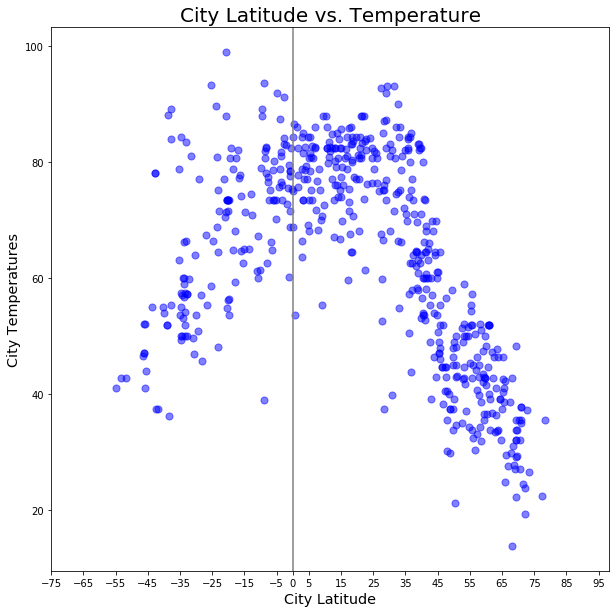

In [27]:
# Plot Latitude vs. Temperature
# =============================

# Change the Figure Size
fig, ax = plt.subplots(figsize=(10,10))

# Create Variables for the Series
lat = city_weather_df["Lat"]
temp = city_weather_df["Max Temp"]

# Set x limits
ax.set_xlim(lat.min() - 20, lat.max() + 20)

# Set x ticks
ax.set_xticks([round(x) for x in np.arange(lat.min() - 20, lat.max() + 20, step= 10)] + [0])

# Create the x & y labels
ax.set_xlabel("City Latitude", size= "x-large")
ax.set_ylabel("City Temperatures", size= "x-large")

# Create the Title
ax.set_title("City Latitude vs. Temperature", size= 20)

# Create Equator Vertical Line
ax.axvline(x=0, color= 'gray')

# Plot the Series
ax.scatter(lat, temp, color= "b", marker="o", s= 50, alpha=.5)

plt.show()

fig.savefig("../Images/City Latitude vs. Temperature.png")


#### Latitude vs. Humidity Plot

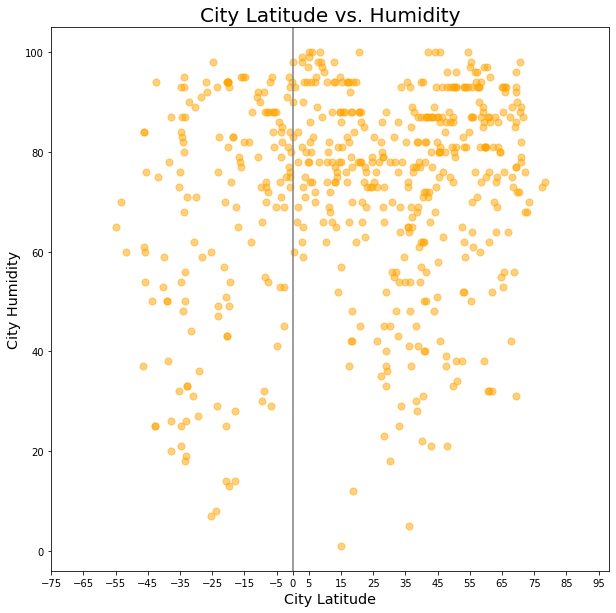

In [28]:
# Plot Latitude vs. Humidity
# =============================

# Change the Figure Size
fig, ax = plt.subplots(figsize=(10,10))

# Create Variables for the Series
lat = city_weather_df["Lat"]
temp = city_weather_df["Humidity"]

# Set x limits
ax.set_xlim(lat.min() - 20, lat.max() + 20)

# Set x ticks
ax.set_xticks([round(x) for x in np.arange(lat.min() - 20, lat.max() + 20, step= 10)] + [0])

# Create the Title
ax.set_title("City Latitude vs. Humidity", size= 20)

# Create Equator Vertical Line
ax.axvline(x=0, color= 'gray')

# Create the x & y labels
ax.set_xlabel("City Latitude", size= "x-large")
ax.set_ylabel("City Humidity", size= "x-large")

# Plot the Series
ax.scatter(lat, temp, color= "orange", marker="o", s= 50, alpha=.5)

plt.show()

fig.savefig("../Images/City Latitude vs. Humidity.png")

#### Latitude vs. Cloudiness Plot

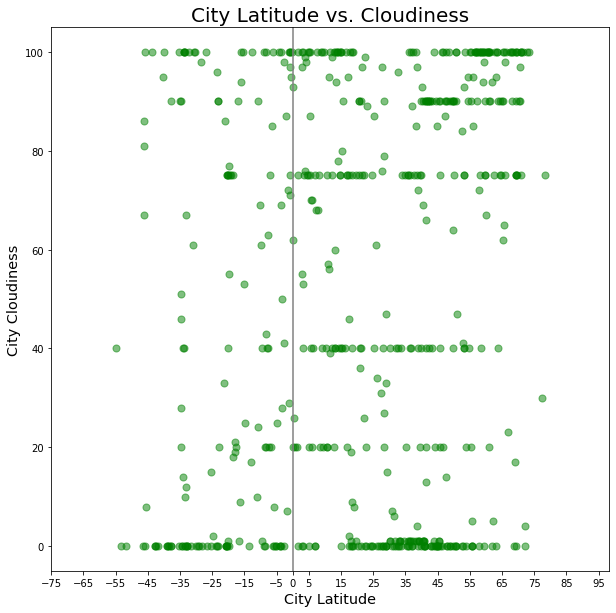

In [29]:
# Plot Latitude vs. Cloudiness
# =============================

# Change the Figure Size
fig, ax = plt.subplots(figsize=(10,10))

# Create Variables for the Series
lat = city_weather_df["Lat"]
temp = city_weather_df["Cloudiness"]

# Set x limits
ax.set_xlim(lat.min() - 20, lat.max() + 20)

# Set x ticks
ax.set_xticks([round(x) for x in np.arange(lat.min() - 20, lat.max() + 20, step= 10)] + [0])

# Create the x & y labels
ax.set_xlabel("City Latitude", size= "x-large")
ax.set_ylabel("City Cloudiness", size= "x-large")

# Create the Title
ax.set_title("City Latitude vs. Cloudiness", size= 20)

# Create Equator Vertical Line
ax.axvline(x=0, color= 'gray')

# Plot the Series
ax.scatter(lat, temp, color= "g", marker="o", s= 50, alpha=.5)

plt.show()

fig.savefig("../Images/City Latitude vs. Cloudiness.png")

#### Latitude vs. Wind Speed Plot

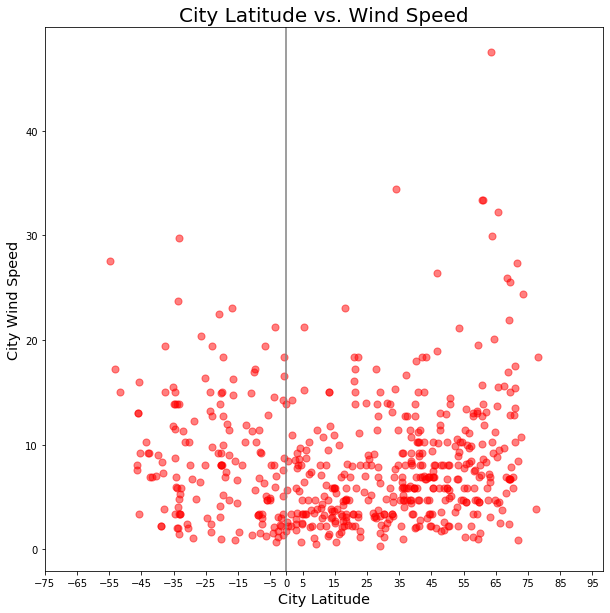

In [30]:
# Plot Latitude vs. Wind Speed
# =============================

# Change the Figure Size
fig, ax = plt.subplots(figsize=(10,10))

# Create Variables for the Series
lat = city_weather_df["Lat"]
temp = city_weather_df["Wind Speed"]

# Set x limits
ax.set_xlim(lat.min() - 20, lat.max() + 20)

# Set x ticks
ax.set_xticks([round(x) for x in np.arange(lat.min() - 20, lat.max() + 20, step= 10)] + [0])

# Create the x & y labels
ax.set_xlabel("City Latitude", size= "x-large")
ax.set_ylabel("City Wind Speed", size= "x-large")

# Create the Title
ax.set_title("City Latitude vs. Wind Speed", size= 20)

# Create Equator Vertical Line
ax.axvline(x=0, color= 'gray')

# Plot the Series
ax.scatter(lat, temp, color= "r", marker="o", s= 50, alpha=.5)

plt.show()

fig.savefig("../Images/City Latitude vs. Wind Speed.png")